In [69]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            # 解析每一行并转换为浮点数
            values = list(map(float, line.split()))
            data.append(values)
    return np.array(data)

In [70]:
filename = '../poisson_disk_sample.txt'
data = load_data(filename)
data.shape

(354, 3)

In [71]:
max_x = np.max(data[:, 0])
max_y = np.max(data[:, 1])
max_r = np.max(data[:, 2])
print('max_x:', max_x)
print('max_y:', max_y)
print('max_r:', max_r)

max_x: 0.999645
max_y: 0.967798
max_r: 0.160306


In [72]:
float_max_num = sum(data[:, 2] ==max_r)
print('max_r_num:', float_max_num)

max_r_num: 1


In [73]:
min_x = np.min(data[:, 0])
min_y = np.min(data[:, 1])

print('min_x:', min_x)
print('min_y:', min_y)

min_x: -0.981815
min_y: -0.970472


In [74]:
data = data[data[:, 2] < 1]

In [75]:
filename = "../triangulation.txt"
data_triangle = load_data(filename)

In [76]:
print(data_triangle.shape)

(682, 11)


In [77]:
points = np.zeros((data_triangle.shape[0],3, 2))
weights = np.zeros((data_triangle.shape[0],3))
center = np.zeros((data_triangle.shape[0], 2))
index = 0

# solve power center c according to the following equations:
# dist(p1-c)^2 - w1 = dist(p2-c)^2 - w2
# dist(p2-c)^2 - w2 = dist(p3-c)^2 - w3
def calculate_center(points, weights):
    # Unpack points
    (x1, y1), (x2, y2), (x3, y3) = points
    w1, w2, w3 = weights
        # Set up the system of equations
    A = np.array([[2 * (x2 - x1), 2 * (y2 - y1)], 
                  [2 * (x3 - x1), 2 * (y3 - y1)]])    
    b = np.array([
        (x2**2 + y2**2 - w2) - (x1**2 + y1**2 - w1), 
        (x3**2 + y3**2 - w3) - (x1**2 + y1**2 - w1)
    ])
    
    # Solve for (xc, yc)
    center = np.linalg.solve(A, b)
    
    return center

unmatched = []

for line in data_triangle:
    x1, y1, w1, x2, y2, w2, x3, y3, w3 = line[:9]
    points[index,:] = np.array([[x1, y1], [x2, y2], [x3, y3]])
    weights[index,:] = np.array([w1, w2, w3])
    # c1, c2 = calculate_center(points[index], weights[index])
    # center[index,:] = np.array([c1, c2])

    # pre_c1, pre_c2 = line[9:]

    # if abs(c1 - pre_c1) > 1e-3 or abs(c2 - pre_c2) > 1e-3:
    #     print('index:', index)
    #     print('c1:', c1, 'pre_c1:', pre_c1)
    #     print('c2:', c2, 'pre_c2:', pre_c2)
    #     print('points:', points[index])
    #     print('weights:', weights[index])
    #     print('center:', center[index])
    #     unmatched.append(index)

    index += 1
print('unmatched size:', len(unmatched))


unmatched size: 0


In [78]:
# check_index = []

# def power_distence(p1,w1,p2,w2):
#     p12 = p1 - p2
#     return np.dot(p12, p12) - w1 - w2
# r2 = max_r * max_r
# for i in range(data_triangle.shape[0]):
#     d0 = power_distence(points[i,0], weights[i,0], center[i], 0)
#     d1 = power_distence(points[i,1], weights[i,1], center[i], 0)
#     d2 = power_distence(points[i,2], weights[i,2], center[i], 0)
#     assert abs(d0-d1) < 1e-5 and abs(d1-d2) < 1e-5 and abs(d0-d2) < 1e-5
#     if d0 > 0 and np.dot(center[i], center[i]) <= 1:
#         check_index.append(i)


# len(check_index)

In [79]:
data_gapfill = []
num_gapfill = []

with open("../gap_fill.txt", 'r') as file:
    for line in file:
        # 解析每一行并转换为浮点数
        values = list(map(float, line.split()))
        if(len(values)==1):
            num_gapfill.append(int(values[0]))
        else:
            data_gapfill.append(values)
data_gapfill = np.array(data_gapfill)
num_gapfill = np.array(num_gapfill)
print(data_gapfill.shape)


(154, 3)


In [80]:
from scipy.spatial import ConvexHull


file_conflict = '../conflict.txt'
data_conflict = []
num = []

with open(file_conflict, 'r') as file:
    for line in file:
        # 解析每一行并转换为浮点数
        values = list(map(float, line.split()))
        if(len(values)==1):
            num.append(int(values[0])+1)
        else:
            data_conflict.append(values)
data_conflict = np.array(data_conflict)
num = np.array(num)
def plot_polygons(num, data):
    idx = 0
    for i,n in  enumerate(num):
        # 提取多边形的顶点坐标
        data_conflict = data[idx:idx + n]
        center = data_conflict[0,:]
        polygon_data = data_conflict[1:,:]
        # hull = ConvexHull(polygon_data)
        # hull_points = polygon_data[hull.vertices]
        # 提取凸包的x和y坐标
        x_coords = polygon_data[:, 0]
        y_coords = polygon_data[:, 1]

        # 将多边形封闭，即将最后一个顶点与第一个顶点连接
        x_coords = np.append(x_coords, x_coords[0])
        y_coords = np.append(y_coords, y_coords[0])

        # 绘制凸包多边形
        plt.plot(x_coords, y_coords)
        plt.scatter(center[0], center[1], s=3)

        # 更新索引
        idx += n
    # plt.scatter(center[check_index,0], center[check_index,1], c='r', s=3)
    # 设置图形属性并显示

plot_polygons(num, data_conflict)
print('conflict size:', num.size)


conflict size: 0


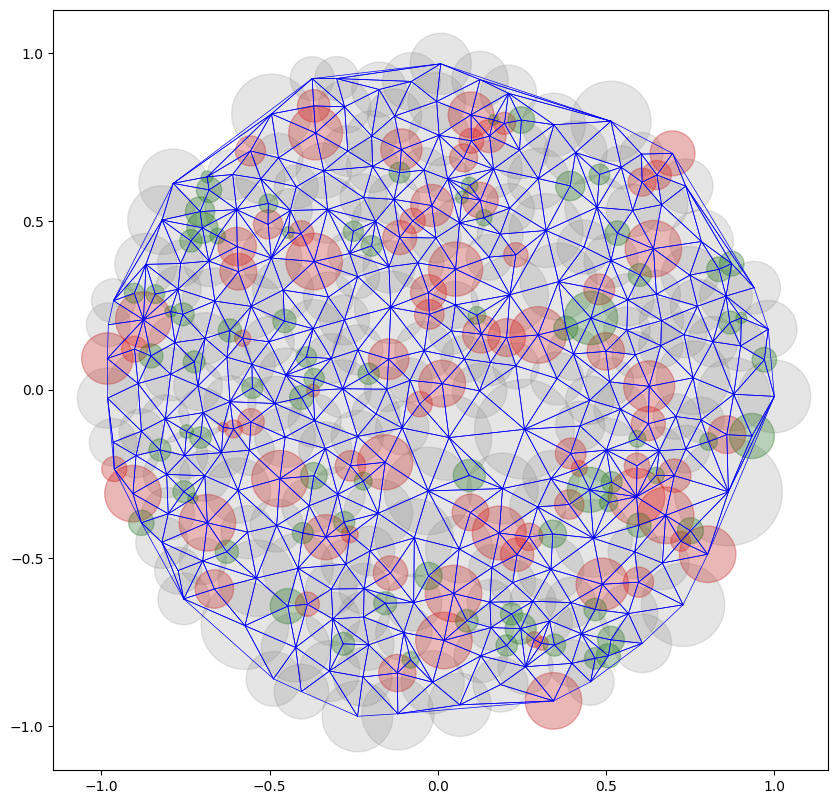

In [81]:
# data: x, y, r

fig, ax = plt.subplots(figsize=(10, 10))

for x, y, r in data:
    circle = plt.Circle((x, y), r, color='grey', fill=True, alpha=0.2)
    ax.add_artist(circle)
num_gap = 0
for x, y, r in data_gapfill:
    if num_gap < num_gapfill[0]:
        circle = plt.Circle((x, y), r, color='red', fill=True, alpha=0.2)
    else:
        circle = plt.Circle((x, y), r, color='green', fill=True, alpha=0.2)
    ax.add_artist(circle)
    num_gap += 1

# for i in range(data.shape[0]):
#     for j in range(3):
#         p = points[i,j]
#         r = np.sqrt(weights[i,j])
#         circle = plt.Circle(p, r, color='grey', fill=True, alpha=1)
#         ax.add_artist(circle)

for i in range(points.shape[0]):
    p1, p2, p3 = points[i]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b', linewidth=0.5)
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'b', linewidth=0.5)
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'b', linewidth=0.5)

# plot_polygons(num, data_conflict)

all_x = data[:, 0]
all_y = data[:, 1]
max_radius = max(data[:, 2])

ax.set_xlim(min(all_x) - max_radius, max(all_x) + max_radius)
ax.set_ylim(min(all_y) - max_radius, max(all_y) + max_radius)

ax.set_aspect('equal')

plt.show()


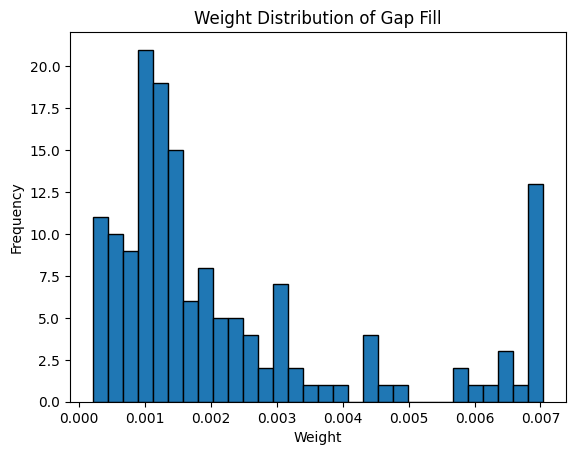

In [82]:
# gap fill
plt.hist(data_gapfill[:,2]**2, bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution of Gap Fill')
plt.show()

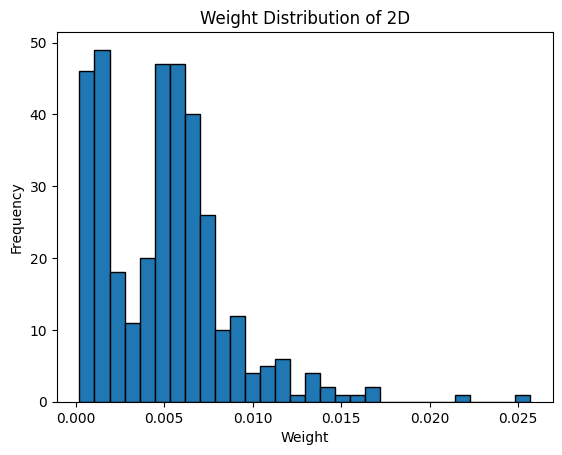

In [83]:
plt.hist(data[:,2]**2, bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution of 2D')
plt.show()

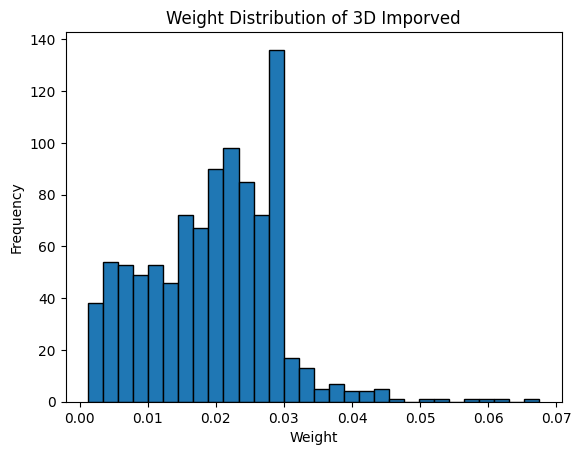

In [108]:
file_weight = "../weights_3.txt"
data_weight = load_data(file_weight)
plt.hist((data_weight), bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution of 3D Imporved')
plt.show()

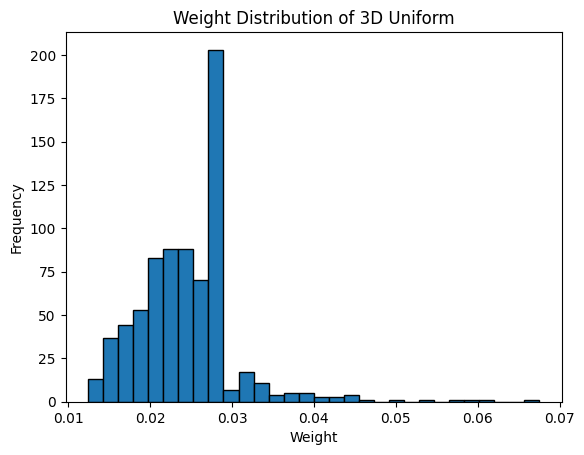

In [107]:
file_weight = "../weights_nearest.txt"
data_weight = load_data(file_weight)
plt.hist((data_weight), bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution of 3D Uniform')
plt.show()

In [ ]:
file_weight = "../weights_radius_smallest.txt"
data_weight = load_data(file_weight)
plt.hist((data_weight), bins=30, edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Distribution of 3D Smallest Radius')
plt.show()